## Bikes Data Analysis

__Problem Statement__ - Bike-sharing system are meant to rent the bicycle and return to the different place for the bike sharing purpose in Washington DC.You are provided with rental data spanning for 2 years. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.


#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

Load Training Data 

In [2]:
train= pd.read_csv('Data/train_bikes.csv' ,parse_dates=['datetime'])

Load Testing Data

In [3]:
test = pd.read_csv('Data/test_bikes.csv')

Check start and end of file 

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


#### Plot the counts based on the season

<AxesSubplot:xlabel='season', ylabel='count'>

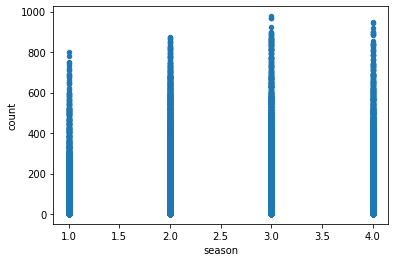

In [6]:
train.plot.scatter(x = 'season', y = 'count') 

#### Plot the counts based on the holidays

<AxesSubplot:xlabel='holiday', ylabel='count'>

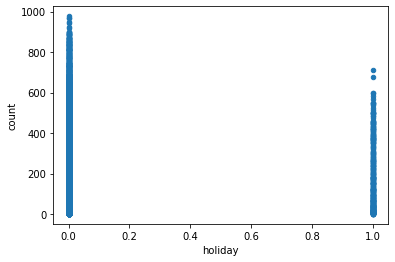

In [7]:
train.plot.scatter(x='holiday',y='count')

#### Plot the counts based on working day

<AxesSubplot:xlabel='workingday', ylabel='count'>

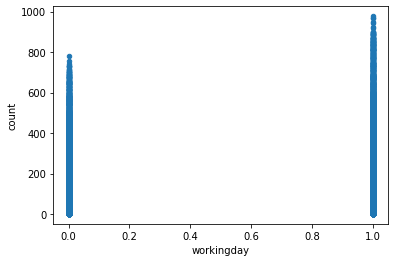

In [8]:
train.plot.scatter(x = 'workingday', y = 'count')

#### Plot the counts based on the weather

<AxesSubplot:xlabel='weather', ylabel='count'>

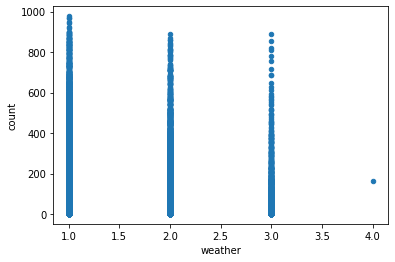

In [9]:
train.plot.scatter(x = 'weather', y = 'count')

 #### Plot the counts based on the temparature

<AxesSubplot:xlabel='temp', ylabel='count'>

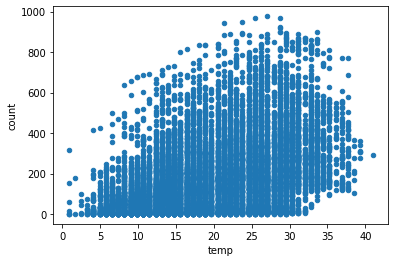

In [10]:
train.plot.scatter(x = 'temp', y = 'count')

#### Plot the counts based on atemp

<AxesSubplot:xlabel='atemp', ylabel='count'>

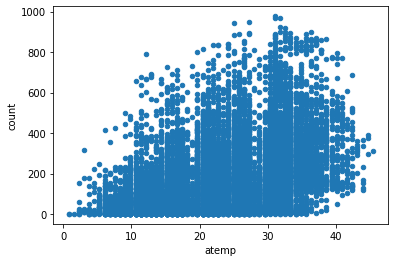

In [11]:
train.plot.scatter(x = 'atemp', y = 'count') 

#### Plot the counts based on humidity

<AxesSubplot:xlabel='humidity', ylabel='count'>

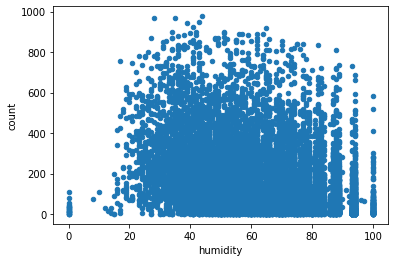

In [12]:
train.plot.scatter(x = 'humidity', y = 'count')

#### Plot the counts based on windspeed

<AxesSubplot:xlabel='windspeed', ylabel='count'>

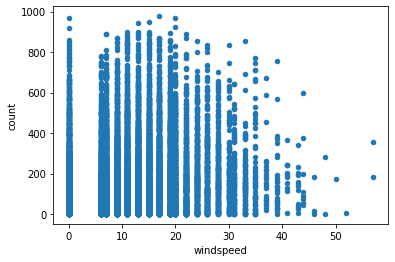

In [13]:
train.plot.scatter(x = 'windspeed', y = 'count')

#### Plot the counts based casual user

<AxesSubplot:xlabel='casual', ylabel='count'>

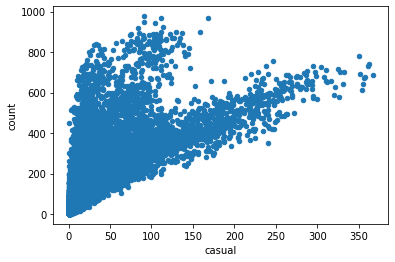

In [14]:
train.plot.scatter(x = 'casual', y = 'count')

#### Lets Observe the data types of the columns

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


#### Generate descriptive statistics that summarize the central tendency,dispersion and shape of a dataset's distribution

In [16]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Print the number of rows and columns

In [17]:
print("Count samples & features: ", train.shape)

Count samples & features:  (10886, 12)


Print if dataset has any NaN value

In [18]:

print("Are there missing values: ", train.isnull().values.any()) 

Are there missing values:  False


In [19]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Code Method for creating the count plot based on hour for a given year

C:\Users\mhmom\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mhmom\Anaconda3\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\mhmom\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

<AxesSubplot:title={'center':'Year = 2012'}, xlabel='hour'>

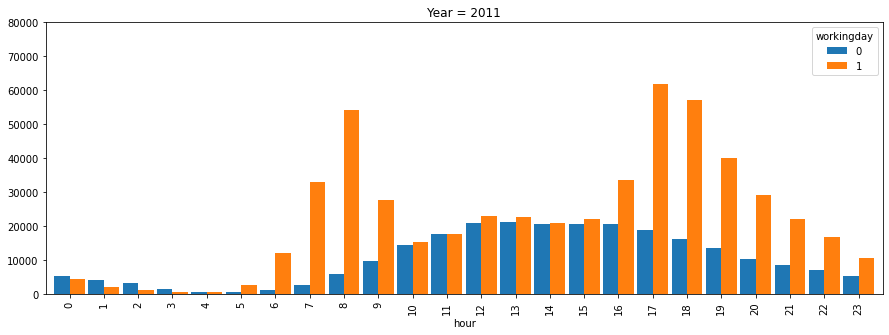

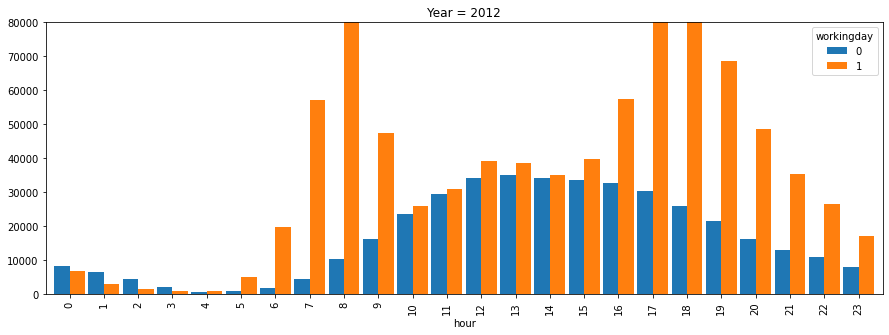

In [20]:
def plot_by_hour(data,year=None,agg='sum'):
    dd=data
    if year: dd = dd[dd.datetime.dt.year == year]
    dd.loc[:,('hour')]= dd.datetime.dt.hour 
    
    by_hour = dd.groupby(['hour','workingday'])['count'].agg(agg).unstack() #groupby hour and working day
    return by_hour.plot(kind = 'bar', ylim=(0,80000),figsize=(15,5) ,width=0.9, title ="Year = {0}".format(year))

plot_by_hour(train, year=2011) # plotting the count plot based on hour for 2011 
plot_by_hour(train, year=2012) # plotting the count plot based on hour for 2012 
            

Code Method for creating the count plot based on year

<AxesSubplot:title={'center':'Rent bikes per hour in 2011 and 2012'}, xlabel='hour'>

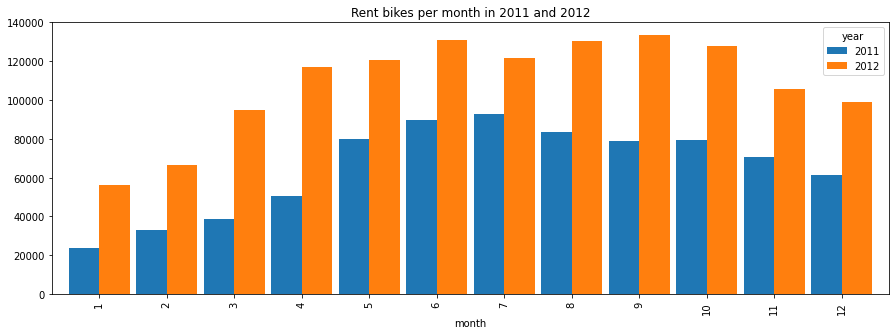

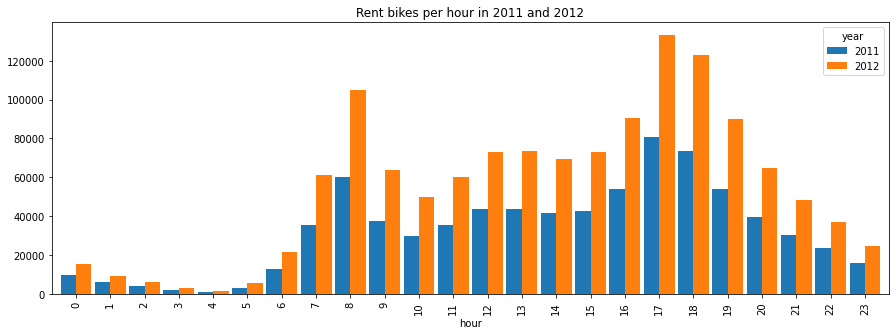

In [21]:
def plot_by_year(aggr_attr,title):
    
    #extracting the required field 
    dd=train.copy()
    dd['year']=train.datetime.dt.year
    dd['month']=train.datetime.dt.month
    dd['hour']=train.datetime.dt.hour
    
    by_year=dd.groupby([aggr_attr,'year'])['count'].agg('sum').unstack()
    return by_year.plot(kind='bar', figsize=(15,5), width=0.9, title=title)

plot_by_year('month', "Rent bikes per month in 2011 and 2012") # plotting monthly bike rentals based on year
plot_by_year('hour', "Rent bikes per hour in 2011 and 2012") # plotting hourls bike rentals based  on year

Code Method to plot a graph for count per hour  

In [22]:
def plot_hours(data,message=''):
    
    dd=train.copy()
    
    dd['hour']=dd.datetime.dt.hour
    
    hours={}
    for hour in range(24):
        hours[hour]= dd[dd.hour==hour]['count'].values
        
    plt.figure(figsize=(20,10))
    plt.ylabel("Count rent")
    plt.xlabel("Hours")
    plt.title("count vs hours\n" + message)
    plt.boxplot( [hours[hour] for hour in range(24)])
    
    axis = plt.gca()
    axis.set_ylim([1, 1100])     

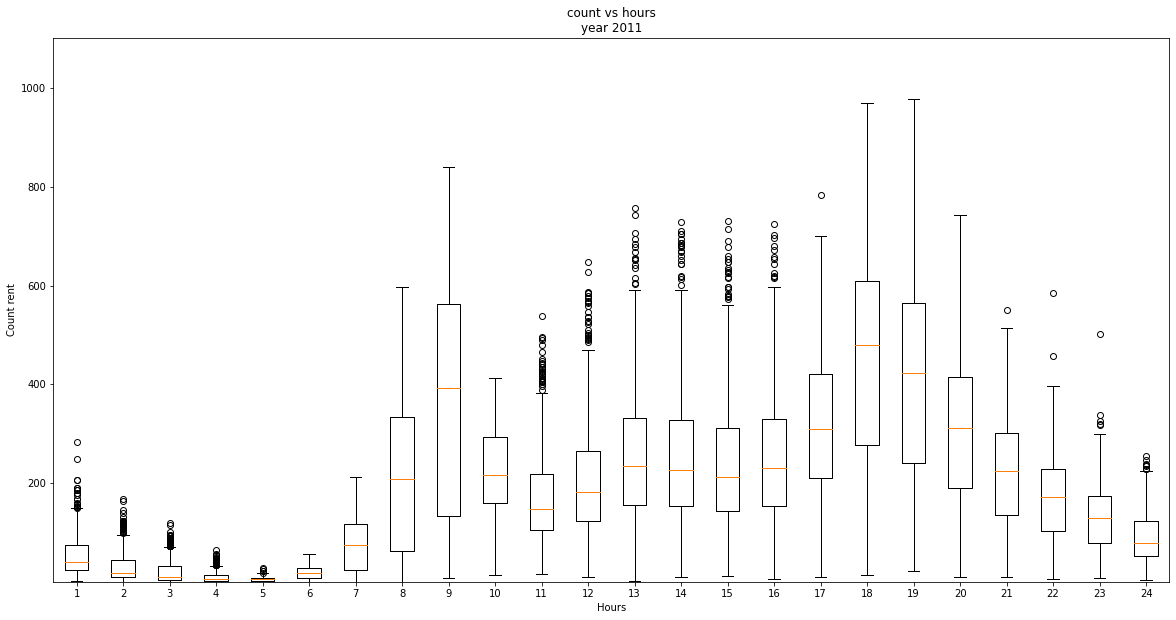

In [23]:
plot_hours( train[train.datetime.dt.year == 2011], 'year 2011') # box plot for hourly count for the mentioned year

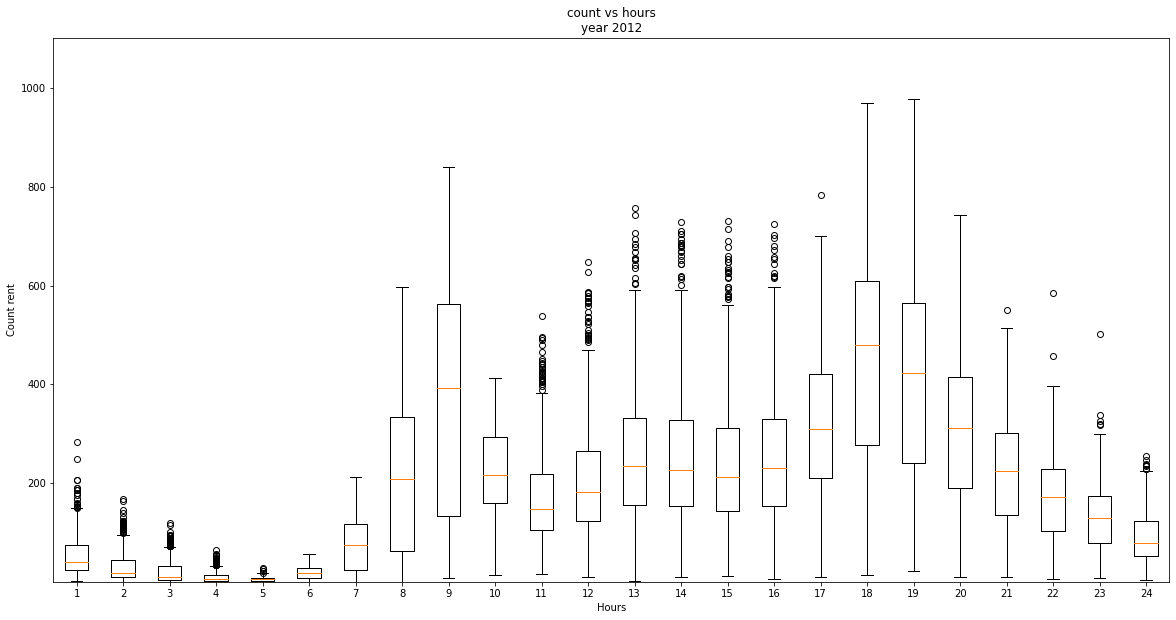

In [24]:
plot_hours( train[train.datetime.dt.year == 2012], 'year 2012') # box plot for hourly count for the mentioned year

In [25]:
dt = pd.to_datetime(train["datetime"]) # converting the column to datetime for train dataset
train["hour"] = dt.map(lambda x: x.hour) # adding the hour column for train dataset
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [26]:
dt_test = pd.to_datetime(test["datetime"]) # converting the column to datetime for test dataset
test["hour"] = dt_test.map(lambda x: x.hour) # adding the hour column for test dataset
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4


#### Drop unnecessary columns

In [27]:
train = train.drop(['datetime'], axis=1)
test = test.drop(['datetime'], axis=1)

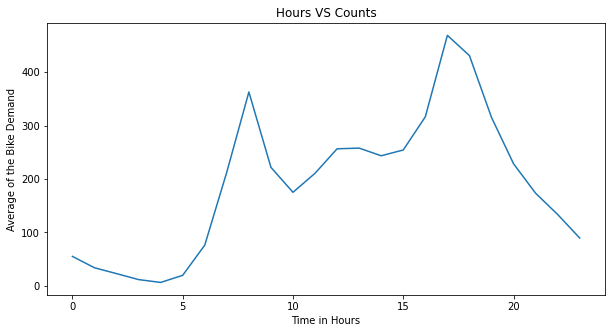

In [28]:
# an Hour bs Count Graph depicting average bike demand based on the hour 
figure,axes = plt.subplots(figsize = (10, 5))
hours = train.groupby(["hour"]).agg("mean")["count"]  
hours.plot(kind="line", ax=axes) 
plt.title('Hours VS Counts')
axes.set_xlabel('Time in Hours')
axes.set_ylabel('Average of the Bike Demand')
plt.show()

In [29]:
# count of different temp values
a = train.groupby('temp')[['count']].mean()
a

,count
temp,
0.82,77.714286
1.64,91.500000
2.46,43.000000
3.28,19.272727
4.10,50.272727
4.92,58.416667
5.74,53.233645
6.56,68.109589
7.38,67.754717


In [30]:
# count of different atemp values
a = train.groupby('atemp')[['count']].mean()
a

,count
atemp,
0.760,1.000000
1.515,3.000000
2.275,38.000000
3.030,82.285714
3.790,39.062500
4.545,66.090909
5.305,63.200000
6.060,64.876712
6.820,56.380952


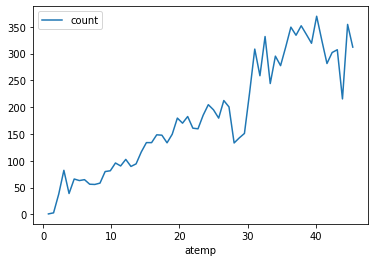

In [31]:
a.plot()
plt.show()

##### Count based on holiday

In [32]:
a = train.groupby('holiday')[['count']].mean()

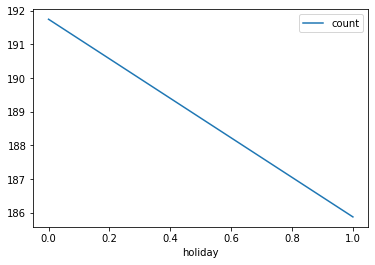

In [33]:
a.plot()
plt.show()